 20200328 ML Note
- by using second hand car price prediction data as example. 

# Task 1 + Task2 + Task3

# Task1 Understanding 

Goal of competition: get a minimum MAE, between pred price and final test prize.   

# Task2 Explorary data analysis 

## 1. Importing data manipulation libs & data viz libs

***Libruary missingno is not included in Anaconda. In Anaconda Terminal, run: "conda install -c conda-forge missingno"

In [78]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 2. Importing datas: train data & test data

In [79]:
Train_data = pd.read_csv('used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv('used_car_testA_20200313.csv', sep=' ')
print('Train data shape:',Train_data.shape)
print('TestA data shape:',Test_data.shape)

Train data shape: (150000, 31)
TestA data shape: (50000, 30)


In [80]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


## 3. General data explorary

In [81]:
Train_data.shape

(150000, 31)

In [82]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48587 non-null float64
fuelType             47107 non-null float64
gearbox              48090 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non

In [83]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


## 4. NA & abnormal value checking


### 4.1. NA checking

In [84]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [85]:
#Train_data.info()

In [86]:
#Test_data.info()

In [87]:
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [88]:
#Test_data.isnull().sum()

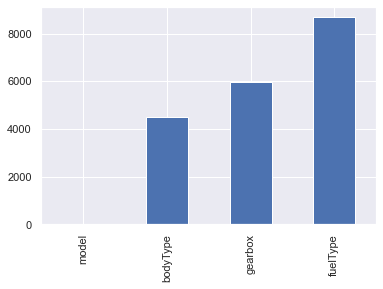

In [89]:
# Viz of NA values
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

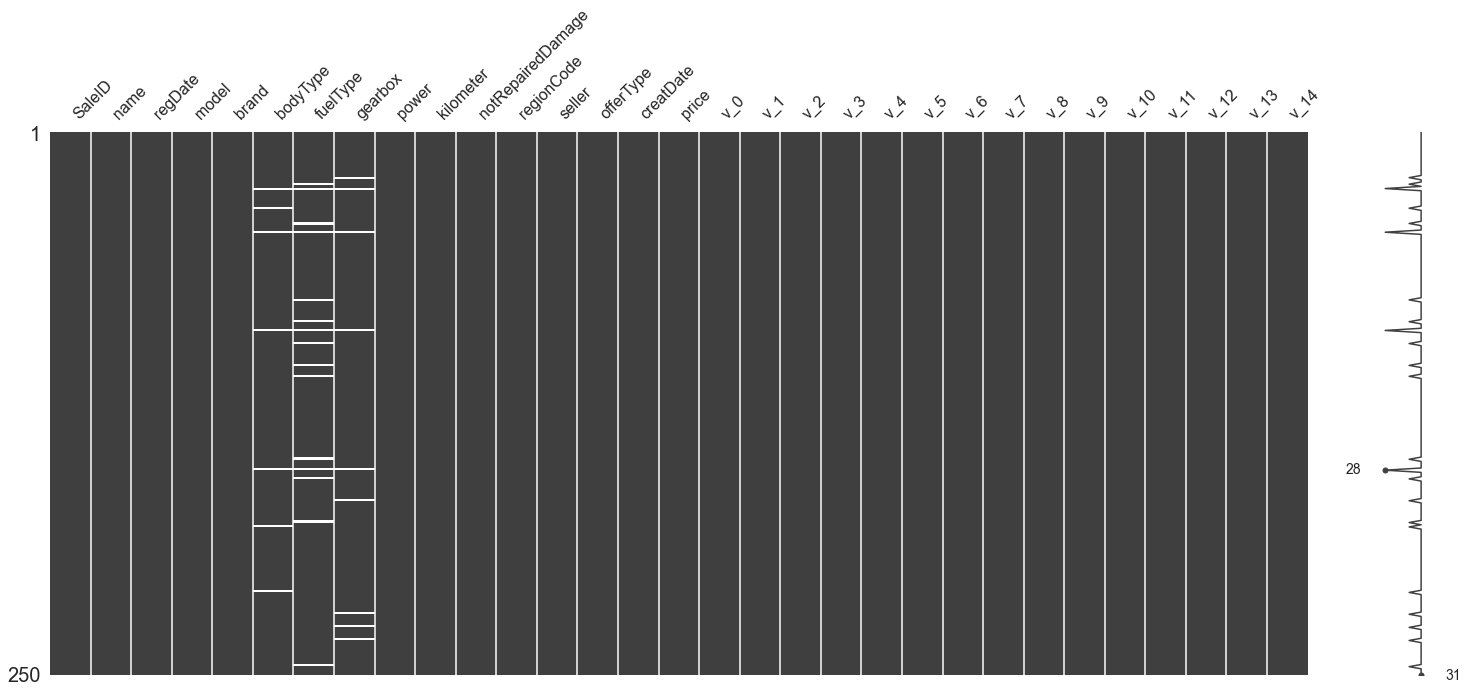

In [90]:
# 可视化看下缺省值
msno.matrix(Train_data.sample(250))

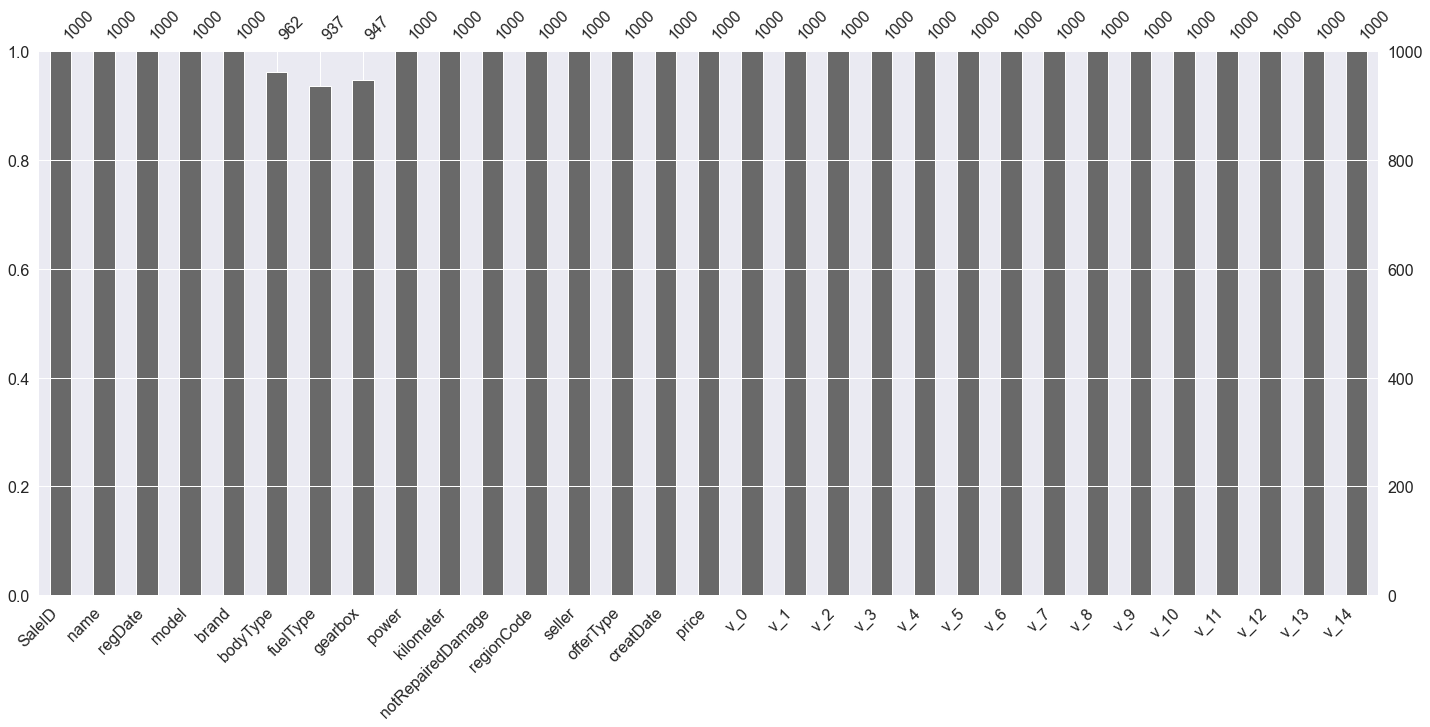

In [91]:
msno.bar(Train_data.sample(1000))

In [92]:
#msno.matrix(Test_data.sample(250))

In [93]:
#msno.bar(Test_data.sample(1000))

### 4.2. Abnormal value checking

In [94]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

可以发现除了notRepairedDamage 为object类型其他都为数字 这里我们把他的几个不同的值都进行显示就知道了

In [95]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

可以看出来‘ - ’也为空缺值，因为很多模型对nan有直接的处理，这里我们先不做处理，先替换成nan

In [96]:
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [97]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [98]:
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [99]:
Test_data['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [100]:
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

以下两个类别特征严重倾斜，一般不会对预测有什么帮助，故这边先删掉，当然你也可以继续挖掘，但是一般意义不大:

In [101]:
Train_data["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [102]:
Train_data["offerType"].value_counts()

0    150000
Name: offerType, dtype: int64

In [103]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

## 5. Realizing the distribution of predicted value 了解预测值的分布
- Checking the distribution 总体分布概况（无界约翰逊分布等）
- Checking skewness and kurtoisis 
- Checking the frequency of predicted value 查看预测值的具体频数

In [104]:
Train_data['price']

0          1850
1          3600
2          6222
3          2400
4          5200
5          8000
6          3500
7          1000
8          2850
9           650
10         3100
11         5450
12         1600
13         3100
14         6900
15         3200
16        10500
17         3700
18          790
19         1450
20          990
21         2800
22          350
23          599
24         9250
25         3650
26         2800
27         2399
28         4900
29         2999
          ...  
149970      900
149971     3400
149972      999
149973     3500
149974     4500
149975     3990
149976     1200
149977      330
149978     3350
149979     5000
149980     4350
149981     9000
149982     2000
149983    12000
149984     6700
149985     4200
149986     2800
149987     3000
149988     7500
149989     1150
149990      450
149991    24950
149992      950
149993     4399
149994    14780
149995     5900
149996     9500
149997     7500
149998     4999
149999     4700
Name: price, Length: 150

In [105]:
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
600      1535
3500     1533
800      1513
2000     1378
999      1356
750      1279
4500     1271
650      1257
1800     1223
2200     1201
850      1198
700      1174
900      1107
1300     1105
950      1104
3000     1098
1100     1079
5500     1079
1600     1074
300      1071
550      1042
350      1005
1250     1003
6500      973
1999      929
         ... 
21560       1
7859        1
3120        1
2279        1
6066        1
6322        1
4275        1
10420       1
43300       1
305         1
1765        1
15970       1
44400       1
8885        1
2992        1
31850       1
15413       1
13495       1
9525        1
7270        1
13879       1
3760        1
24250       1
11360       1
10295       1
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

### 5.1.Checking the distribution 总体分布概况（无界约翰逊分布等）

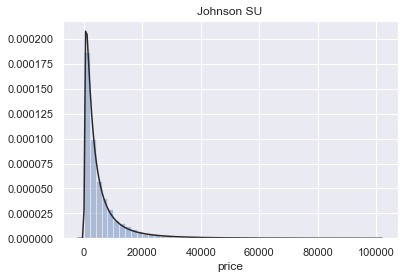

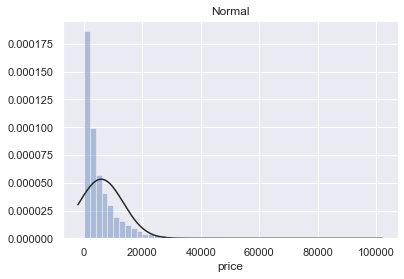

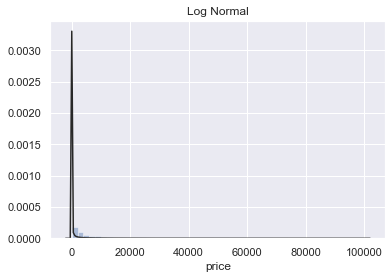

In [106]:
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

价格不服从正态分布，所以在进行回归之前，它必须进行转换。虽然对数变换做得很好，但最佳拟合是无界约翰逊分布

### 5.2. Checking skewness and kurtoisis

Skewness: 3.346487
Kurtosis: 18.995183


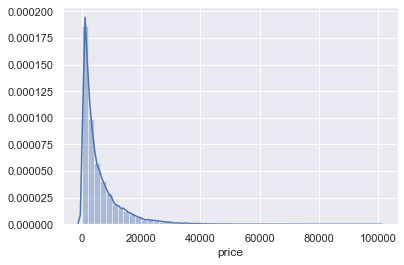

In [107]:
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew())
print("Kurtosis: %f" % Train_data['price'].kurt())

In [108]:
Train_data.skew(), Train_data.kurt()

(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

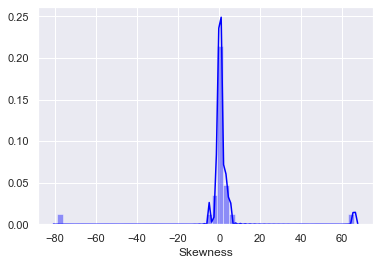

In [109]:
sns.distplot(Train_data.skew(),color='blue',axlabel ='Skewness')

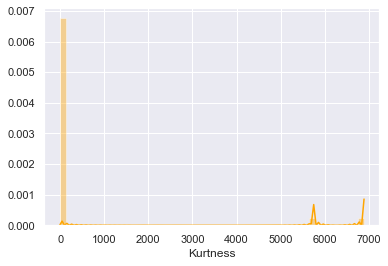

In [110]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

skew、kurt说明参考https://www.cnblogs.com/wyy1480/p/10474046.html

### 5.3. Checking the frequency of predicted value 查看预测值的具体频数

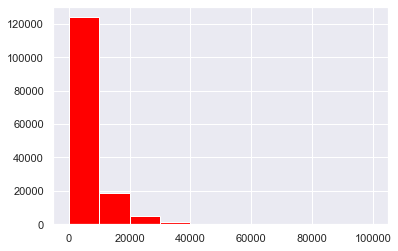

In [111]:
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行

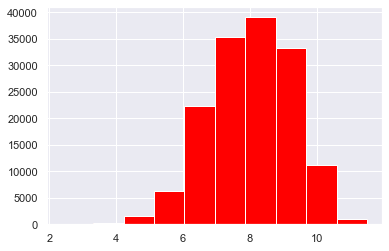

In [112]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

## 6. Dividing features into categorical and numerical ones
- Checking the "unique" distribution of categorical features 特征分为类别特征和数字特征，并对类别特征查看unique分布

In [116]:
# 分离label即预测值
Y_train = Train_data['price']

In [117]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
# numeric_features = Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# # 类型特征
# categorical_features = Train_data.select_dtypes(include=[np.object])
# categorical_features.columns

In [118]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [119]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
53        221
713       217
290       197
1186      184
911       182
2044      176
1513      160
1180      158
631       157
893       153
2765      147
473       141
1139      137
1108      132
444       129
306       127
2866      123
2402      116
533       114
1479      113
422       113
4635      110
725       110
964       109
1373      104
         ... 
89083       1
95230       1
164864      1
173060      1
179207      1
181256      1
185354      1
25564       1
19417       1
189324      1
162719      1
191373      1
193422      1
136082      1
140180      1
144278      1
146327      1
148376      1
158621      1
1404        1
15319       1
46022       1
64463       1
976         1
3025        1
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445

In [120]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个37453不同的值
55        97
708       96
387       95
1541      88
713       74
53        72
1186      67
203       67
631       65
911       64
2044      62
2866      60
1139      57
893       54
1180      52
2765      50
1108      50
290       48
1513      47
691       45
473       44
299       43
444       41
422       39
964       39
1479      38
1273      38
306       36
725       35
4635      35
          ..
46786      1
48835      1
165572     1
68204      1
171719     1
59080      1
186062     1
11985      1
147155     1
134869     1
138967     1
173792     1
114403     1
59098      1
59144      1
40679      1
61161      1
128746     1
55022      1
143089     1
14066      1
147187     1
112892     1
46598      1
159481     1
22270      1
89855      1
42752      1
48899      1
11808      1
Name: name, Length: 37453, dtype: int64
model的特征分布如下：
model特征有个247不同的值
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
48.0     1685
26.0     1525
40.0   

## 7. Numerical features analysis
- Correlation analysis
- Check some numerical features to get the skewness and kurtoisis  查看几个特征得 偏度和峰值
- Viz of each numerical feature 每个数字特征得分布可视化
- Viz of relation between each 2 numerical features数字特征相互之间的关系可视化
- Viz of relation between each multi numerical features多变量互相回归关系可视化

In [121]:
numeric_features.append('price')
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [122]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


### 7.1. Correlation analysis

In [123]:
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



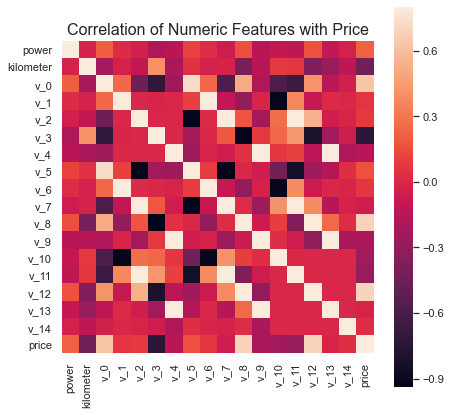

In [124]:
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

In [125]:
del price_numeric['price']

### 7.2. Check some numerical features to get the skewness and kurtoisis  查看几个特征得 偏度和峰值

In [126]:
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(Train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())  
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


### 7.3. Viz of each numerical feature 每个数字特征得分布可视化

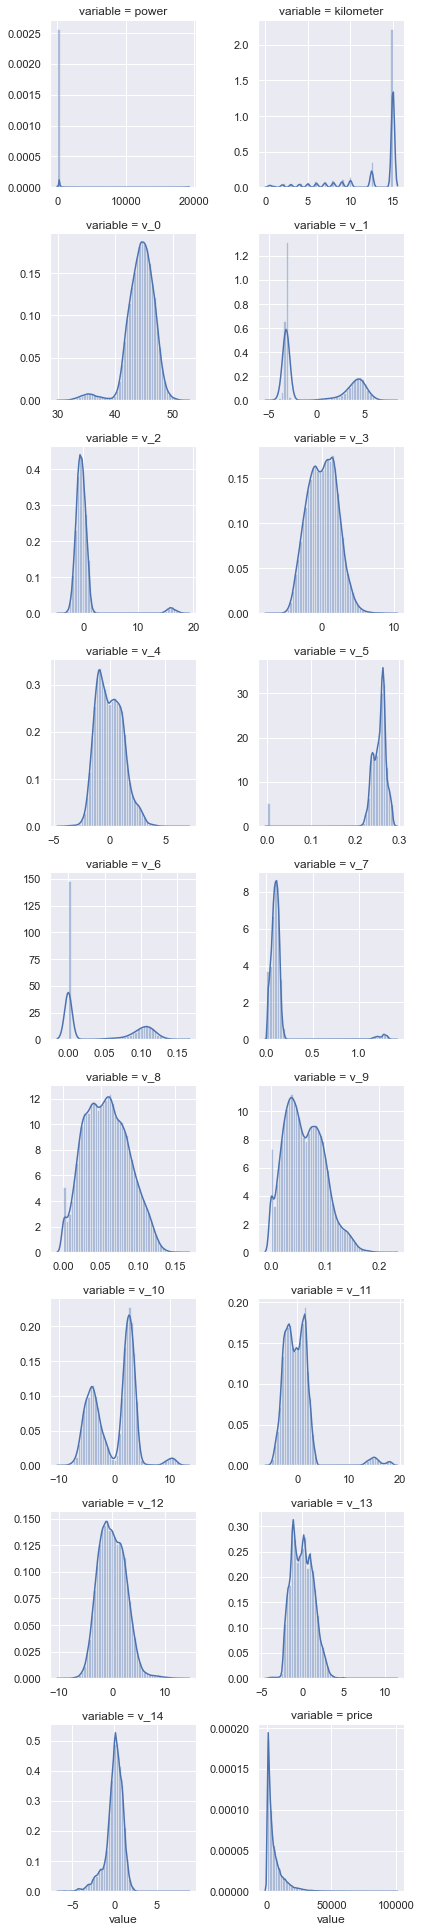

In [127]:
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

### 7.4. Viz of relation between each 2 numerical features 数字特征相互之间的关系可视化

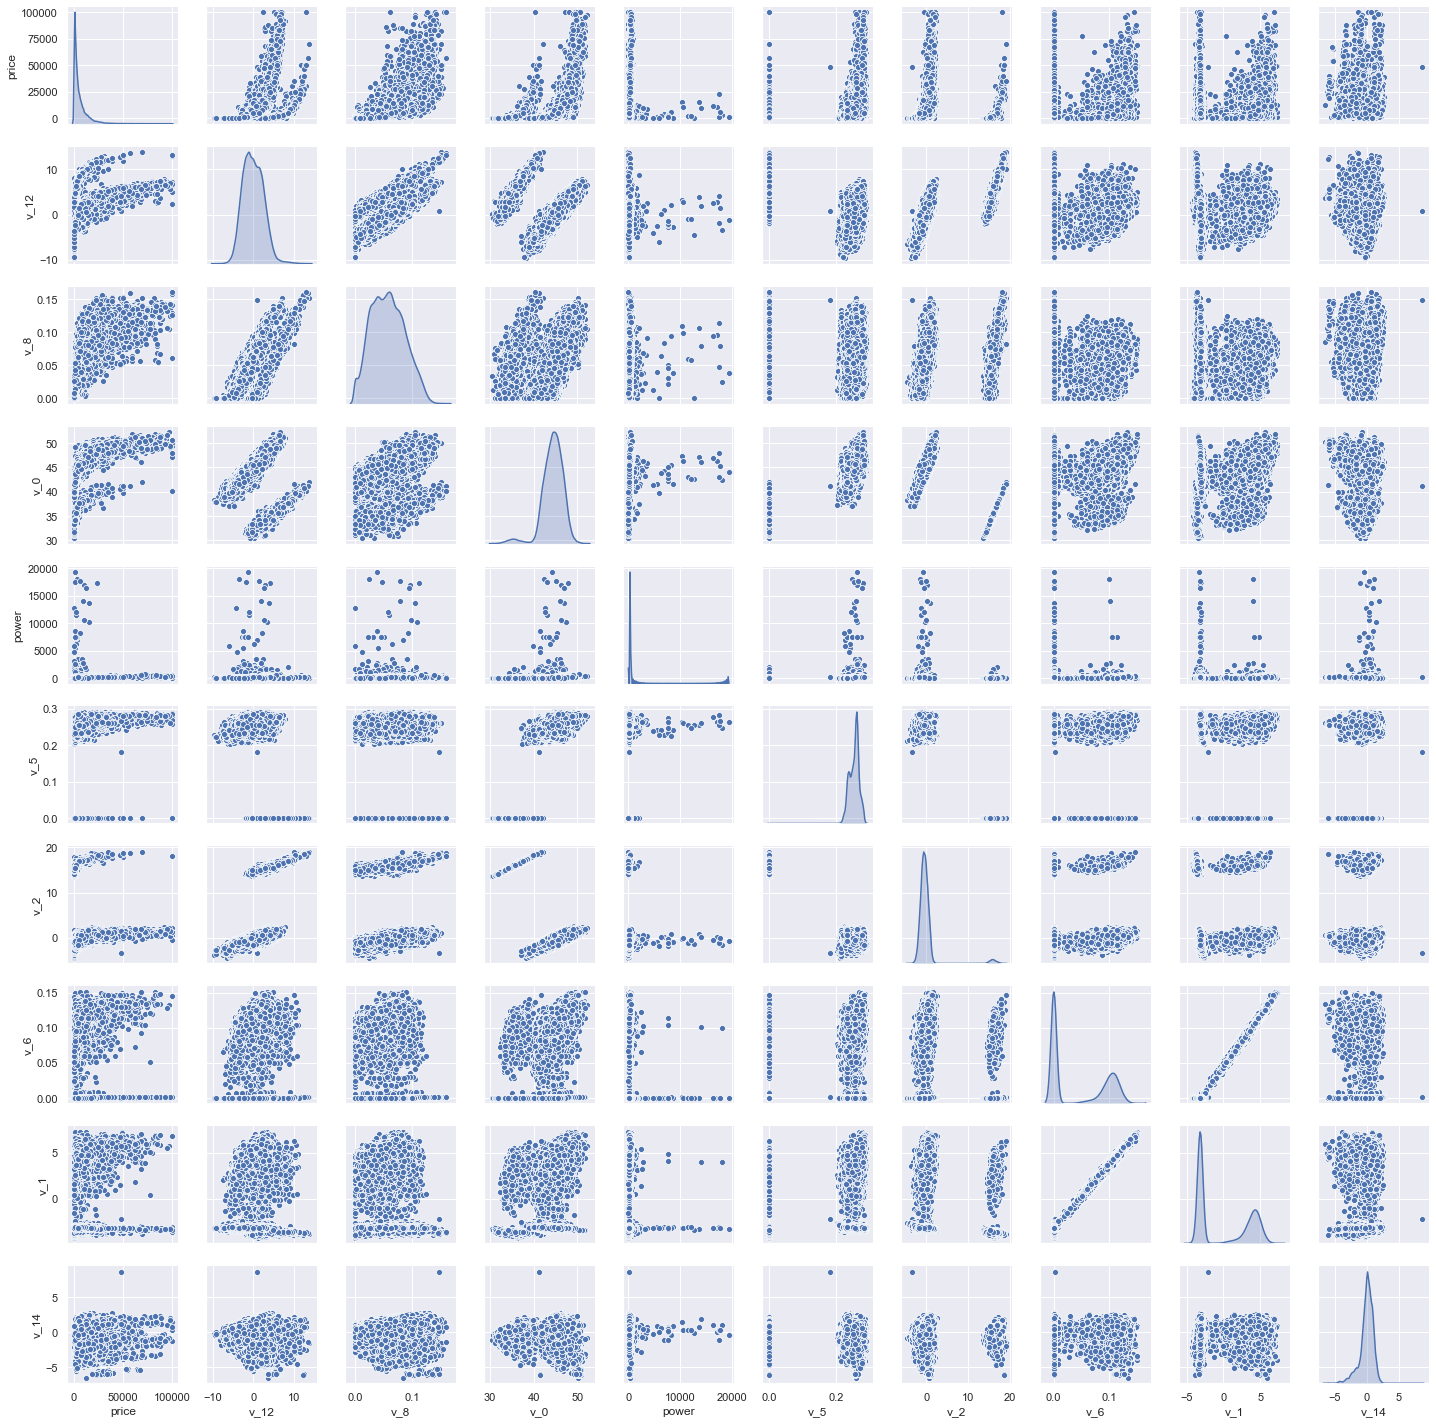

In [128]:
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [129]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [130]:
Y_train

0          1850
1          3600
2          6222
3          2400
4          5200
5          8000
6          3500
7          1000
8          2850
9           650
10         3100
11         5450
12         1600
13         3100
14         6900
15         3200
16        10500
17         3700
18          790
19         1450
20          990
21         2800
22          350
23          599
24         9250
25         3650
26         2800
27         2399
28         4900
29         2999
          ...  
149970      900
149971     3400
149972      999
149973     3500
149974     4500
149975     3990
149976     1200
149977      330
149978     3350
149979     5000
149980     4350
149981     9000
149982     2000
149983    12000
149984     6700
149985     4200
149986     2800
149987     3000
149988     7500
149989     1150
149990      450
149991    24950
149992      950
149993     4399
149994    14780
149995     5900
149996     9500
149997     7500
149998     4999
149999     4700
Name: price, Length: 150

此处是多变量之间的关系可视化，可视化更多学习可参考很不错的文章 https://www.jianshu.com/p/6e18d21a4cad

### 7.5. Viz of relation between multi numerical features 多变量互相回归关系可视化

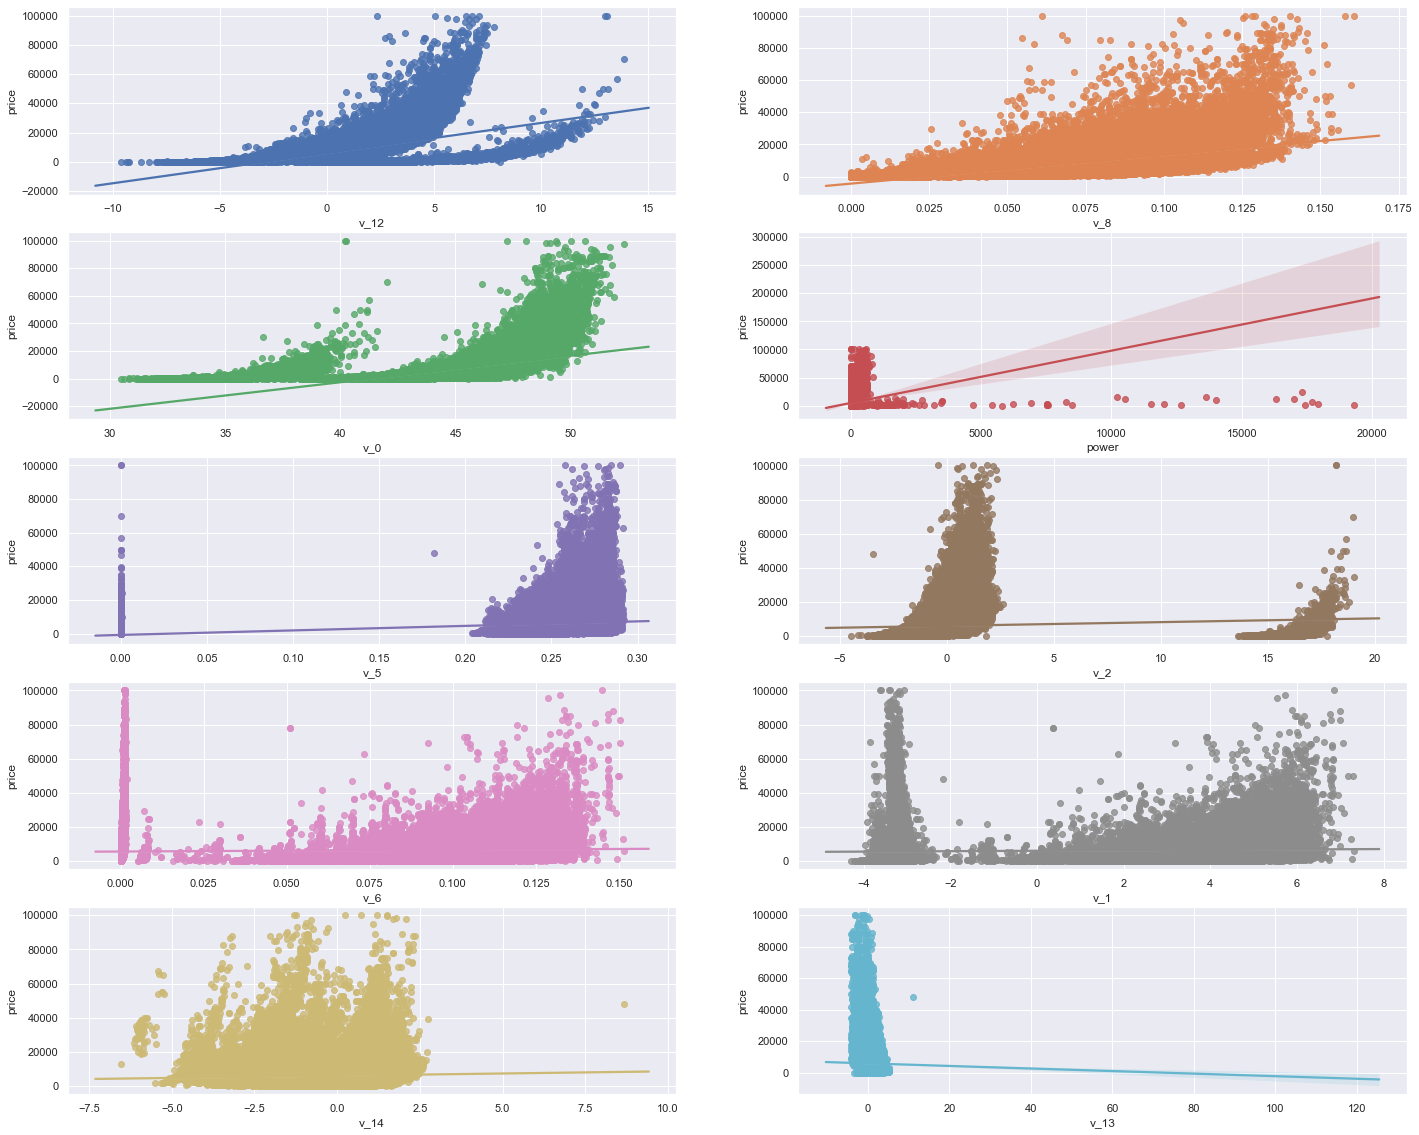

In [131]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

## 8. Categorical features analysis 类型特征分析
- Unique ID distribution  
- Viz of box plot from categorical features 
- Viz of violin plot from categorical features 
- Viz of bar chart from categorical features
- Viz of frequency from each categorical features 特征的每个类别频数可视化(count_plot)

### 8.1. Unique ID distribution 

In [132]:
# unique分布
for fea in categorical_features:
    print(Train_data[fea].nunique())

99662
248
40
8
7
2
2
7905


In [133]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

### 8.2. Viz of box plot from categorical features 类类别特征箱形图可视化

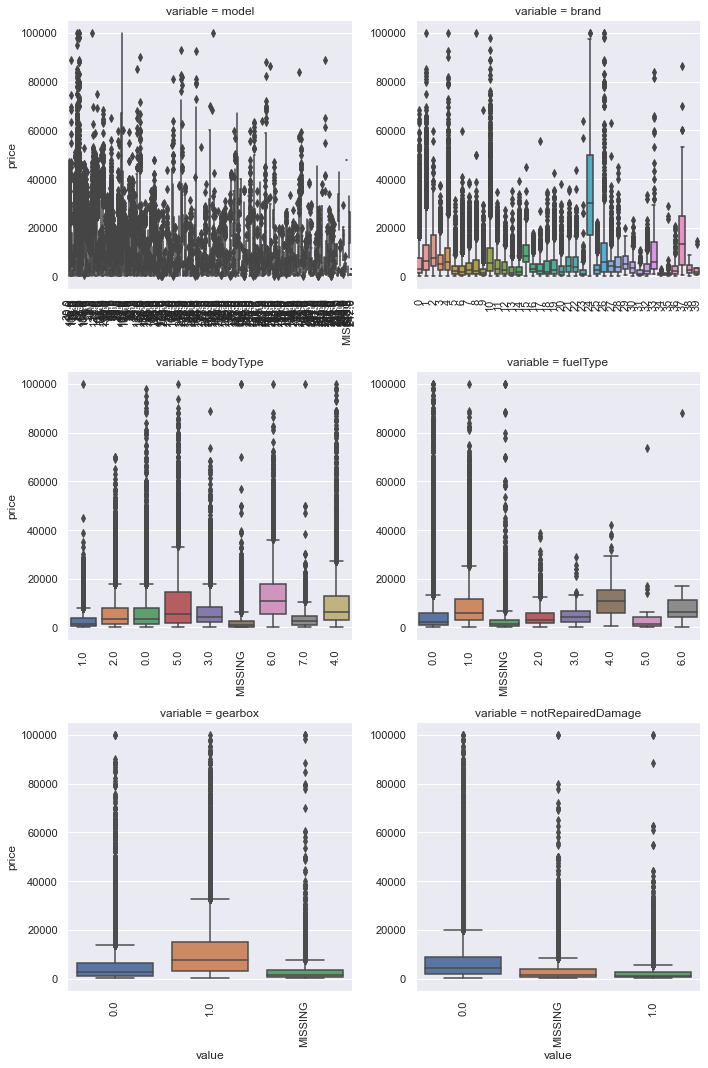

In [134]:
# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下


categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

In [135]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

### 8.3. Viz of violin graph from categorical features 类别特征的小提琴图可视化

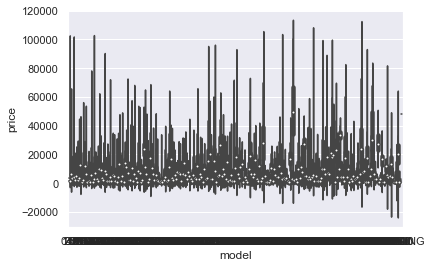

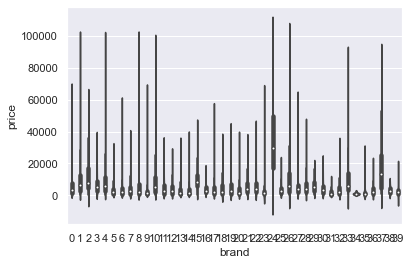

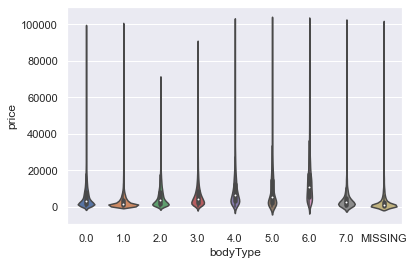

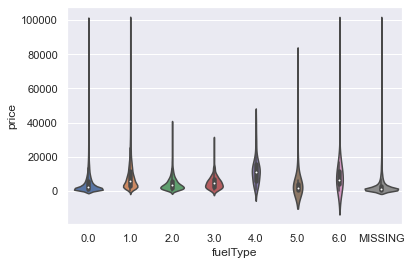

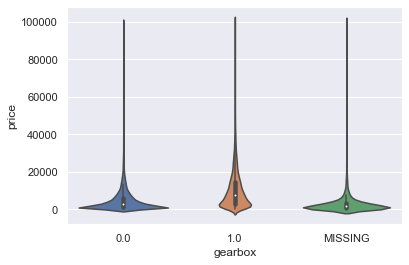

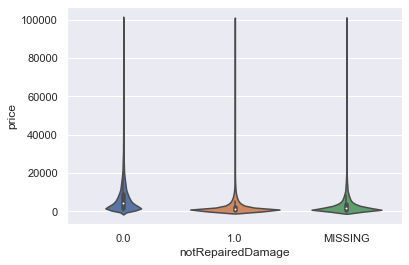

In [136]:
catg_list = categorical_features
target = 'price'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=Train_data)
    plt.show()

In [137]:
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']

### 8.4. Viz of bar chart from categorical features 类别特征的柱形图可视化

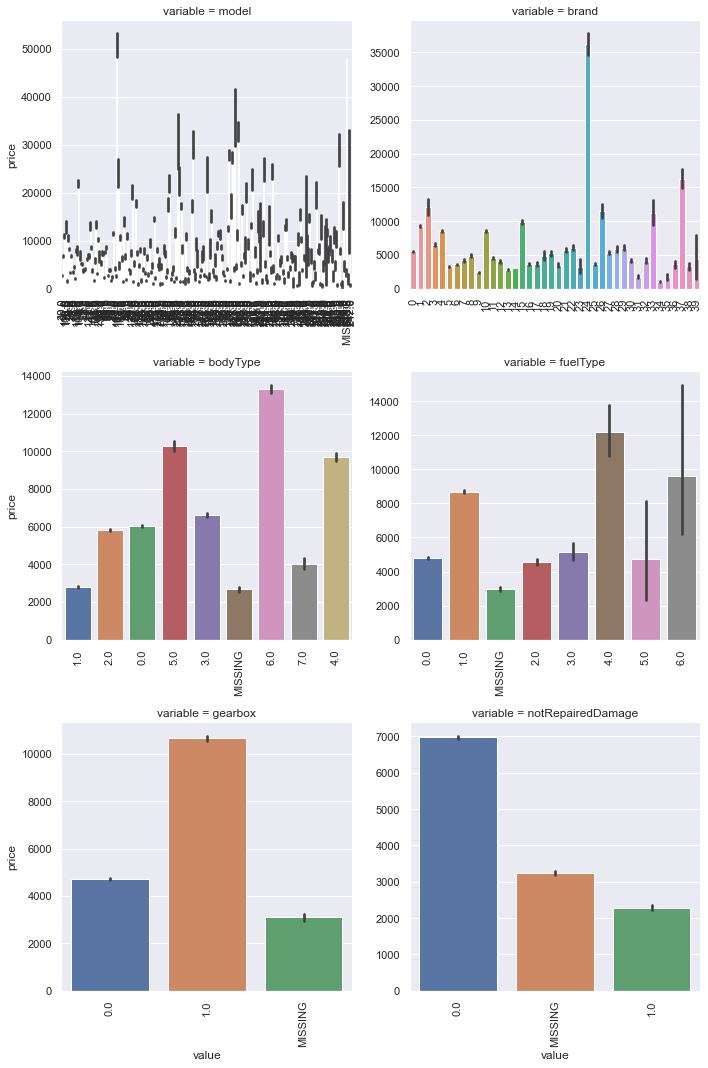

In [138]:
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "price")

### 8.5. Viz of frequency from each categorical features 特征的每个类别频数可视化(count_plot)

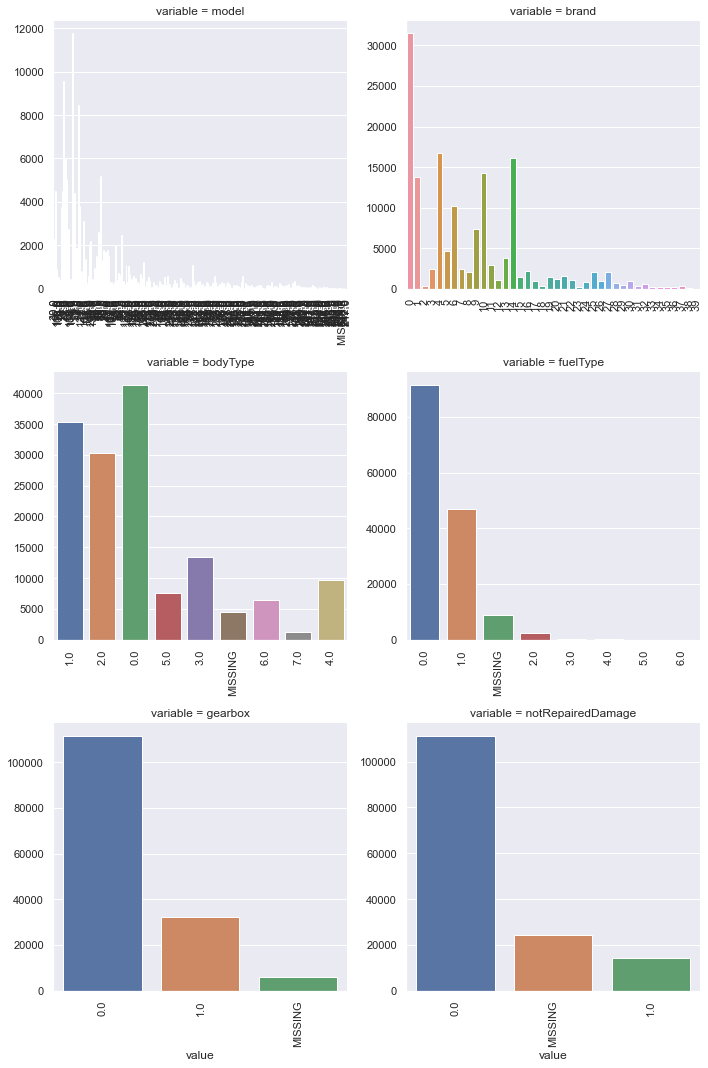

In [139]:
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")

## 9. Use pandas_profiling to generate a data report 

用pandas_profiling生成一个较为全面的可视化和数据报告(较为简单、方便) 最终打开html文件即可

***Libruary pandas_profiling is not included in Anaconda. In Anaconda Terminal, run: "conda install -c conda-forge pandas-profiling"

In [140]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file("./example.html")

## 10. Resume

经验总结(By: AI蜗牛车)
所给出的EDA步骤为广为普遍的步骤，在实际的不管是工程还是比赛过程中，这只是最开始的一步，也是最基本的一步。

接下来一般要结合模型的效果以及特征工程等来分析数据的实际建模情况，根据自己的一些理解，查阅文献，对实际问题做出判断和深入的理解。

最后不断进行EDA与数据处理和挖掘，来到达更好的数据结构和分布以及较为强势相关的特征

数据探索在机器学习中我们一般称为EDA（Exploratory Data Analysis）：

是指对已有的数据（特别是调查或观察得来的原始数据）在尽量少的先验假定下进行探索，通过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法。

数据探索有利于我们发现数据的一些特性，数据之间的关联性，对于后续的特征构建是很有帮助的。

对于数据的初步分析（直接查看数据，或.sum(), .mean()，.descirbe()等统计函数）可以从：样本数量，训练集数量，是否有时间特征，是否是时许问题，特征所表示的含义（非匿名特征），特征类型（字符类似，int，float，time），特征的缺失情况（注意缺失的在数据中的表现形式，有些是空的有些是”NAN”符号等），特征的均值方差情况。

分析记录某些特征值缺失占比30%以上样本的缺失处理，有助于后续的模型验证和调节，分析特征应该是填充（填充方式是什么，均值填充，0填充，众数填充等），还是舍去，还是先做样本分类用不同的特征模型去预测。

对于异常值做专门的分析，分析特征异常的label是否为异常值（或者偏离均值较远或者事特殊符号）,异常值是否应该剔除，还是用正常值填充，是记录异常，还是机器本身异常等。

对于Label做专门的分析，分析标签的分布情况等。

进步分析可以通过对特征作图，特征和label联合做图（统计图，离散图），直观了解特征的分布情况，通过这一步也可以发现数据之中的一些异常值等，通过箱型图分析一些特征值的偏离情况，对于特征和特征联合作图，对于特征和label联合作图，分析其中的一些关联性。


# Task3 Feature enginneering

Objective of feature engineering: is to do a deeper analysis of features, and to treat the data as hope. 

特征工程目标：对于特征进行进一步分析，并对于数据进行处理

常见的特征工程包括：

1.异常处理：
通过箱线图（或 3-Sigma）分析删除异常值；
BOX-COX 转换（处理有偏分布）；
长尾截断；

2.特征归一化/标准化：
标准化（转换为标准正态分布）；
归一化（抓换到 [0,1] 区间）；
针对幂律分布，可以采用公式： $log(\frac{1+x}{1+median})$

3.数据分桶：
等频分桶；
等距分桶；
Best-KS 分桶（类似利用基尼指数进行二分类）；
卡方分桶；

4.缺失值处理：
不处理（针对类似 XGBoost 等树模型）；
删除（缺失数据太多）；
插值补全，包括均值/中位数/众数/建模预测/多重插补/压缩感知补全/矩阵补全等；
分箱，缺失值一个箱；

5.特征构造：
构造统计量特征，报告计数、求和、比例、标准差等；
时间特征，包括相对时间和绝对时间，节假日，双休日等；
地理信息，包括分箱，分布编码等方法；
非线性变换，包括 log/ 平方/ 根号等；
特征组合，特征交叉；
仁者见仁，智者见智。
6.特征筛选
过滤式（filter）：先对数据进行特征选择，然后在训练学习器，常见的方法有 Relief/方差选择发/相关系数法/卡方检验法/互信息法；
包裹式（wrapper）：直接把最终将要使用的学习器的性能作为特征子集的评价准则，常见方法有 LVM（Las Vegas Wrapper） ；
嵌入式（embedding）：结合过滤式和包裹式，学习器训练过程中自动进行了特征选择，常见的有 lasso 回归；
7.降维
PCA/ LDA/ ICA；
特征选择也是一种降维。

In [141]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

%matplotlib inline

In [142]:
#Train_data = pd.read_csv('used_car_train_20200313.csv', sep=' ')
#Test_data = pd.read_csv('used_car_testA_20200313.csv', sep=' ')
#print('Train data shape:',Train_data.shape)
#print('TestA data shape:',Test_data.shape)

In [143]:
train = Train_data
test = Test_data
print(train.shape)
print(test.shape)

(150000, 29)
(50000, 28)


In [144]:
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30,6,1,0,0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40,1,2,0,0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115,15,1,0,0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109,10,0,0,1,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110,5,1,0,0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [145]:
train.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [146]:
test.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
       'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

## 1. Analysis of abnormal values (in train data)

1.异常处理：
通过箱线图（或 3-Sigma）分析删除异常值；
BOX-COX 转换（处理有偏分布）；
长尾截断；

In [147]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

## 4. Treatment of abnormal values

In [ ]:
4.缺失值处理：
不处理（针对类似 XGBoost 等树模型）；
删除（缺失数据太多）；
插值补全，包括均值/中位数/众数/建模预测/多重插补/压缩感知补全/矩阵补全等；
分箱，缺失值一个箱；

Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


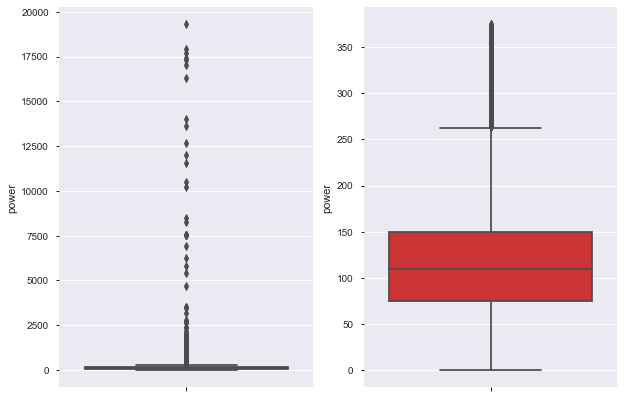

In [148]:
# 我们可以删掉一些异常数据，以 power 为例。  
# 这里删不删同学可以自行判断
# 但是要注意 test 的数据不能删 = = 不能掩耳盗铃是不是

train = outliers_proc(train, 'power', scale=3)

## 2.  Standadization, Normalization

2.特征归一化/标准化：
标准化（转换为标准正态分布）；
归一化（抓换到 [0,1] 区间）；
针对幂律分布，可以采用公式： $log(\frac{1+x}{1+median})$

In [150]:
# 训练集和测试集放在一起，方便构造特征
train['train']=1
test['train']=0
data = pd.concat([train, test], ignore_index=True, sort=False)


In [151]:
# 使用时间：data['creatDate'] - data['regDate']，反应汽车使用时间，一般来说价格与使用时间成反比
# 不过要注意，数据里有时间出错的格式，所以我们需要 errors='coerce'
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [152]:
# 看一下空数据，有 15k 个样本的时间是有问题的，我们可以选择删除，也可以选择放着。
# 但是这里不建议删除，因为删除缺失数据占总样本量过大，7.5%
# 我们可以先放着，因为如果我们 XGBoost 之类的决策树，其本身就能处理缺失值，所以可以不用管；
data['used_time'].isnull().sum()

15072

In [153]:
# 从邮编中提取城市信息，因为是德国的数据，所以参考德国的邮编，相当于加入了先验知识
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])

In [154]:
# 计算某品牌的销售统计量，同学们还可以计算其他特征的统计量
# 这里要以 train 的数据计算统计量
train_gb = train.groupby("brand")
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')

## 3. Bucketing 数据分桶

3.数据分桶：
等频分桶；
等距分桶；
Best-KS 分桶（类似利用基尼指数进行二分类）；
卡方分桶；

In [155]:
# 数据分桶 以 power 为例
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性

bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


In [156]:
# 利用好了，就可以删掉原始数据了
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [157]:
print(data.shape)
data.columns

(199037, 37)


Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'train', 'used_time', 'city', 'brand_amount',
       'brand_price_average', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_std', 'brand_price_sum', 'power_bin'],
      dtype='object')

In [158]:
# 目前的数据其实已经可以给树模型使用了，所以我们导出一下
data.to_csv('data_for_tree.csv', index=0)

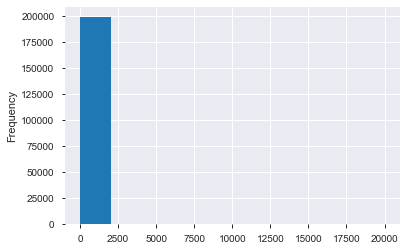

In [159]:
# 我们可以再构造一份特征给 LR NN 之类的模型用
# 之所以分开构造是因为，不同模型对数据集的要求不同
# 我们看下数据分布：
data['power'].plot.hist()

<span style="color:red">**Important:prepare different modelling data for different models!**</span>

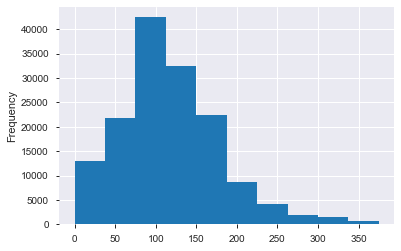

In [160]:
# 我们刚刚已经对 train 进行异常值处理了，但是现在还有这么奇怪的分布是因为 test 中的 power 异常值，
# 所以我们其实刚刚 train 中的 power 异常值不删为好，可以用长尾分布截断来代替
train['power'].plot.hist()

## 5. Creation of new useful features

In [ ]:
5.特征构造：
构造统计量特征，报告计数、求和、比例、标准差等；
时间特征，包括相对时间和绝对时间，节假日，双休日等；
地理信息，包括分箱，分布编码等方法；
非线性变换，包括 log/ 平方/ 根号等；
特征组合，特征交叉；
仁者见仁，智者见智。

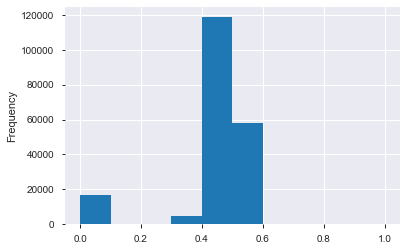

In [161]:
# 我们对其取 log，在做归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data['power'] = np.log(data['power'] + 1) 
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
data['power'].plot.hist()

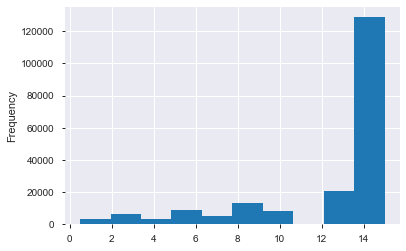

In [162]:
# km 的比较正常，应该是已经做过分桶了
data['kilometer'].plot.hist()

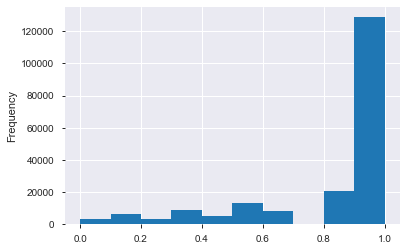

In [163]:
# 所以我们可以直接做归一化
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) / 
                        (np.max(data['kilometer']) - np.min(data['kilometer'])))
data['kilometer'].plot.hist()

In [164]:
# 除此之外 还有我们刚刚构造的统计量特征：
# 'brand_amount', 'brand_price_average', 'brand_price_max',
# 'brand_price_median', 'brand_price_min', 'brand_price_std',
# 'brand_price_sum'
# 这里不再一一举例分析了，直接做变换，
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

data['brand_amount'] = ((data['brand_amount'] - np.min(data['brand_amount'])) / 
                        (np.max(data['brand_amount']) - np.min(data['brand_amount'])))
data['brand_price_average'] = ((data['brand_price_average'] - np.min(data['brand_price_average'])) / 
                               (np.max(data['brand_price_average']) - np.min(data['brand_price_average'])))
data['brand_price_max'] = ((data['brand_price_max'] - np.min(data['brand_price_max'])) / 
                           (np.max(data['brand_price_max']) - np.min(data['brand_price_max'])))
data['brand_price_median'] = ((data['brand_price_median'] - np.min(data['brand_price_median'])) /
                              (np.max(data['brand_price_median']) - np.min(data['brand_price_median'])))
data['brand_price_min'] = ((data['brand_price_min'] - np.min(data['brand_price_min'])) / 
                           (np.max(data['brand_price_min']) - np.min(data['brand_price_min'])))
data['brand_price_std'] = ((data['brand_price_std'] - np.min(data['brand_price_std'])) / 
                           (np.max(data['brand_price_std']) - np.min(data['brand_price_std'])))
data['brand_price_sum'] = ((data['brand_price_sum'] - np.min(data['brand_price_sum'])) / 
                           (np.max(data['brand_price_sum']) - np.min(data['brand_price_sum'])))

In [165]:
# 对类别特征进行 OneEncoder
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])

In [166]:
print(data.shape)
data.columns

(199037, 372)


Index(['SaleID', 'name', 'power', 'kilometer', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4',
       ...
       'power_bin_20.0', 'power_bin_21.0', 'power_bin_22.0', 'power_bin_23.0',
       'power_bin_24.0', 'power_bin_25.0', 'power_bin_26.0', 'power_bin_27.0',
       'power_bin_28.0', 'power_bin_29.0'],
      dtype='object', length=372)

In [167]:
# 这份数据可以给 LR 用
data.to_csv('data_for_lr.csv', index=0)

## 6. Selection of modelling features  

6.特征筛选

过滤式（filter）：先对数据进行特征选择，然后在训练学习器，常见的方法有 Relief/方差选择发/相关系数法/卡方检验法/互信息法；

包裹式（wrapper）：直接把最终将要使用的学习器的性能作为特征子集的评价准则，常见方法有 LVM（Las Vegas Wrapper）；

嵌入式（embedding）：结合过滤式和包裹式，学习器训练过程中自动进行了特征选择，常见的有 lasso 回归； 


### 6.1. Filter out good features

In [170]:
# 相关性分析
print(data['power'].corr(data['price'], method='spearman'))
print(data['kilometer'].corr(data['price'], method='spearman'))
print(data['brand_amount'].corr(data['price'], method='spearman'))
print(data['brand_price_average'].corr(data['price'], method='spearman'))
print(data['brand_price_max'].corr(data['price'], method='spearman'))
print(data['brand_price_median'].corr(data['price'], method='spearman'))

0.5728285196051496
-0.4082569701616764
0.058156610025581514
0.3834909576057687
0.259066833880992
0.38691042393409447


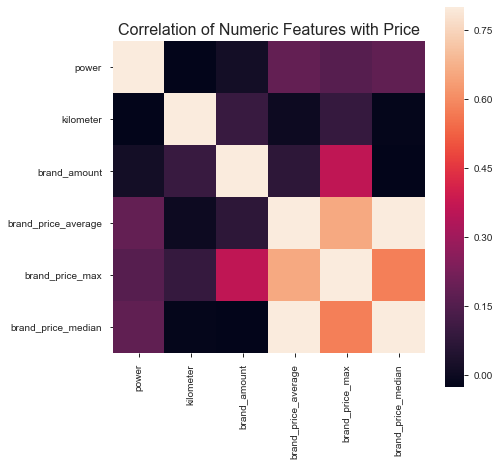

In [171]:
# 当然也可以直接看图
data_numeric = data[['power', 'kilometer', 'brand_amount', 'brand_price_average', 
                     'brand_price_max', 'brand_price_median']]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

### 6.2. Wrapper

In [172]:
!pip install mlxtend

In [174]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

<span style="color:red">**Recheck the part below!**</span>

### 6.6. Embedding

## 7. Dimensionality reduction

7.降维
PCA/ LDA/ ICA；
特征选择也是一种降维。

PCA: Principal component analysis

Linear discriminant analysis (LDA)
    
Linear discriminant analysis (LDA) is a generalization of Fisher's linear discriminant,

a method used in statistics, pattern recognition and machine learning 

to find a linear combination of features that characterizes or separates two or more classes of objects or events.

ICA: Independent component analysis

在机器学习和统计学领域，降维是指在某些限定条件下，降低随机变量个数，得到一组“不相关”主变量的过程。 
降维可进一步细分为变量选择和特征提取两大方法。